## 4. 결측치, 이상치, 중복값 처리(제거 or 대체)

### 데이터 불러오기(타이타닉 데이터셋)

- 종속변수(y) : 생존여부(0 사망, 1 생존)
- 독립변수(x) : pclass,sex,age 등의 탑승자 정보(변수)

In [2]:
import seaborn as sns
sns.get_dataset_names() # 데이터셋 목록

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 1) 결측치 확인 및 처리

In [7]:
# 결측치 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# 결측치 제거
print(df.dropna(axis=0).shape) # 행 기준
print(df.dropna(axis=1).shape) # 열 기준

(182, 15)
(891, 11)


In [13]:
# 결측치 대체
# 데이터 복사
import pandas as pd
df2 = df.copy()
df2 = pd.DataFrame(df)

In [14]:
# 1. 중앙값/평균값 등으로 대체
median_age = df2['age'].median()
mean_age = df2['age'].mean()
print(median_age)
print(mean_age)

28.0
29.69911764705882


In [16]:
df2['age'].isnull().sum()

177

In [17]:
# 구한 중앙값으로 결측치를 대체
df2['age'] = df2['age'].fillna(median_age)

In [19]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
print(df['age'].mean())
print(df2['age'].mean())

29.69911764705882
29.36158249158249


In [21]:
# 중복값 확인
print(df.drop_duplicates().shape)

(784, 15)


### 2) 이상치 확인 및 처리

### 상자그림 활용 (이상치: Q1, Q3로부터 1.5*IQR을 초과하는 값)

<Axes: ylabel='age'>

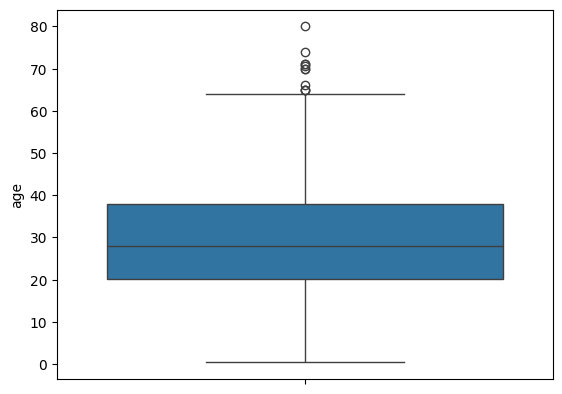

In [22]:
df = sns.load_dataset('titanic')

# 상자그림
sns.boxplot(df['age'])

In [23]:
# Q1, Q3 IQR 구하기
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

20.125 38.0 17.875


In [24]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper, lower)

64.8125 -6.6875


In [29]:
# 문제 : age 변수의 이상치를 제외한 데이터 수는? (상자그림 기준)
cond1 = (df['age']<=upper)
cond2 = (df['age']>=lower)
print(len(df[cond1&cond2]))
print(len(df[cond1]))
print(len(df))

703
703
891


In [30]:
# 문제 : age 변수의 이상치를 제외한 데이터셋 확인(상자그림 기준)
df_new = df[cond1&cond2]
df_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 표준정규분포 활용(이상치: +-3Z 값을 넘어가는 값)

In [33]:
# 데이터 표준화, Z = (개별값-평균)/표준편차

In [34]:
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334042


In [35]:
znorm = (df['age'] - mean_age)/std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [36]:
# 문제 : 이상치의 개수는 몇 개인가? (:+-3Z 기준)

In [38]:
cond1 = (znorm>3)
len(df[cond1])

2

In [39]:
cond2 = (znorm<-3)
len(df[cond2])

0

In [43]:
print(len(df[cond1])+len(df[cond2]))

2


### 3) 중복값 제거

In [44]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [47]:
df1 = df.copy()
df1 = df1.drop_duplicates()
print(df1.shape)
# (주의) 예제에서는 중복값이 있어서 제거했지만,
# 중복값이 나올 수 있는 상황도 있다는 걸 인지하고 파악한 뒤 제거여부를 결정

(784, 15)
